# Report of Assignment 1
The required libraries are:


*   numpy
*   math
*   matplotlib.pyplot
*   csv

Furkan Oz

foz@okstate.edu

# Question 1

In this question, there are some subquestions needs to be addressed. They can be listed as:


1.   it is required to visualize the test and train data to see the underlying relationship between the variables. The below code block illustrates the visual data. According to Figure titled "Input Train and Test Data", the data looks high order or nonlinear. There is only one feature corresponds to $y$ values. The test data is given within the limits of train data which helps to obtain a better model. It is hard to identify the exact relation of the data. However, it can be easily said that the data is not linear, second order polynomial, or gaussian distribution. Before moving further, the best guess would be high order polynomial or sinusoiodal specifically "$x sin(x)$" function might be the best fit for the trend.
2. The mini-questions asked in this part:

a) The relationship is not linear. There are high order terms or nonlinearity in the data.

b) The possible functions that can be tried are high-order polynomial functions or "$x sin(x)$" function. Each of them will be plotted below. The codes are given below. The code structure is as following:


*   The first code block is to visualize test and train data.
*   The second code block is devoted to LinearRegression class. It has to be noted that the code structure is taken from the link (https://towardsdatascience.com/implementing-linear-regression-with-gradient-descent-from-scratch-f6d088ec1219). However, the model and algorithm belongs to me. The reason the structure is taken from there is because lack of knowledge in object-oriented programming in Python. The only similarities with the code is the function names. Additionally, at the end of the assignment, as a bonus, the first problem is also solved with normal equations to learn how to code it.
*    The rest of the code blocks are the main functions for linear regression with first order polynomial, second-order polynomial, sinusoidal function, third-order polynomial, and fourth-order polynomial, respectively.

Each code blocks shows the norm of error for the train data, norm of error for the test data, and figures that shows the visual performance of the model. The norm of the error is defined as:

$|Error|=\sqrt{(h(x)-y)^2}$

The error of the test data for each model is:
*   The first-order model:  16.853435360377834
*   The second-order model: 16.823853779603773
*   The sinusoidal model:   18.890632934478706
*   The third-order model:  88.38010854275852
*   The fourth-order model: 90.41152690286225

From the error data and figures, best approximation is obtained by second-order model. The accuracy may be significantly improved by weighted linear regression method as the train data has significant value fluctuations in the outside region of test data. As a result, the model parameters are highly affected by those values. Weight coefficient may decrease this problem. However, this is the scope of third question.







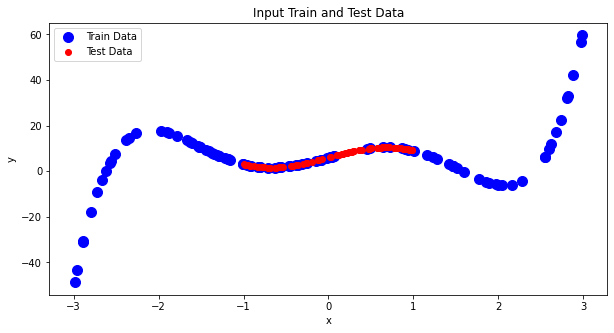

In [ ]:
################################################################################
################################################################################
##### CS 5783 - Machine Learning                                           #####
##### Assignment - 1                                                       #####
##### Question - 1 - 1                                                     #####
#####                                                                      #####
##### 09/16/2022                                                           #####
#####                                                                      #####
##### Furkan Oz                                                            #####
##### foz@okstate.edu                                                      #####
################################################################################
################################################################################
import numpy as np
import matplotlib.pyplot as plt

# Load the data and reshape it for calculations
xArray = np.load('x_train.npy') 
yArray = np.load('y_train.npy')

yArray = np.reshape(yArray,[np.size(xArray,0), 1])

xArray_test = np.load('x_test.npy') 
yArray_test = np.load('y_test.npy')

yArray_test = np.reshape(yArray_test,[np.size(xArray,0), 1])

# Plotting
fig = plt.figure(figsize = (10, 5))

plt.plot(xArray, yArray, 'bo',markersize=10)
plt.plot(xArray_test, yArray_test, 'ro')

plt.xlabel("x")
plt.ylabel("y")
plt.title("Input Train and Test Data")
plt.legend(['Train Data', 'Test Data'])
plt.show()


In [1]:
################################################################################
################################################################################
##### CS 5783 - Machine Learning                                           #####
##### Assignment - 1                                                       #####
##### Question - 1 - 2                                                     #####
#####                                                                      #####
##### 09/16/2022                                                           #####
#####                                                                      #####
##### Furkan Oz                                                            #####
##### foz@okstate.edu                                                      #####
################################################################################
################################################################################
class LinearRegression:
    def __init__(self, alpha=1e-3, n_iters=1000, eps=1e-6, tau=0.5):
        # init parameters
        self.alp = alpha
        self.n_iters = n_iters
        self.theta = None
        self.bias = None
        self.weight = None
        self.tau = tau
        self.eps = eps
    
    def _init_params(self):
        # init parameters
        self.theta = np.zeros(self.nFeatures)
        self.bias = 0
        self.weight = np.identity(self.nSamples)
    
    def _update_params(self, dw, db):
        # update parameters
        self.theta -= self.alp * dw
        self.bias -= self.alp * db
    
    def _get_prediction(self, X):
        return np.sum(self.theta*X,axis=1).reshape((self.nSamples, 1)) + self.bias
    
    def _get_gradients(self, X, y, h):
        dw = np.zeros(self.nFeatures)
        # Calculate error between prediction and real value
        error = h - y
        # Calculate gradients
        for i in range(self.nFeatures):
          dw[i] = (1 / self.nSamples) * np.sum(X[:,i]*error[:,0])
        db = (1 / self.nSamples) * np.sum(error)
        return dw, db, error
    
    def _get_weights(self, X, x_sample):
        # Calculate weights
        self.weight = np.diag(np.exp(-(x_sample-X.flatten())*(x_sample-X.flatten())/(2*self.tau**2)))

    def jacobian(self,h,y):
        return np.linalg.norm(h-y)

    def fit(self, X, y):
        # Get number of samples & features
        self.nSamples, self.nFeatures = X.shape
        # Init weights & bias
        self._init_params()

        h = self._get_prediction(X)

        Jac = 1e9
        JacOld = 0

        n = 0
        # Perform gradient descent for n iterations or until convergence
        while n<self.n_iters and abs(Jac)>self.eps and abs(Jac-JacOld)>self.eps:
        
          # Compute gradients
          dw, db, error = self._get_gradients(X, y, h)
          # Update weights & bias with gradients
          self._update_params(dw, db)
          # Get prediction
          h = self._get_prediction(X)

          n += 1

          JacOld = Jac
          Jac = np.linalg.norm(h-y)

          # Check convergence
          if (n%50==0 or abs(Jac)<self.eps or abs(Jac-JacOld)<self.eps or n>=self.n_iters):
            if (abs(Jac)<self.eps or abs(Jac-JacOld)<self.eps):
              print("Model converged! Final Jacobian of training: ",Jac)

        return h, self.theta, self.bias, Jac

    def weightedFit(self, X, x_data, y):
        # Get number of samples & features
        dataSample, dataFeature = x_data.shape
        self.nSamples, self.nFeatures = X.shape

        # Init weights & bias
        self._init_params()
        h = np.zeros(dataSample)
        h = np.reshape(h,[dataSample, 1])
        for i in range(dataSample):
          x_sample = x_data[i,0]
          # Update weights & bias with gradients
          self._get_weights(X,x_sample)
          self.theta = np.linalg.inv(np.dot(X.T, self.weight@X))*np.dot(X.T, self.weight@y)
          h[i,0] = self.theta*x_sample

        return h

    def predict(self, X):
        h = self._get_prediction(X)
        return h

Model converged! Final Jacobian of training:  130.12918392451016
Final Error of Test Data: 16.853435360377834


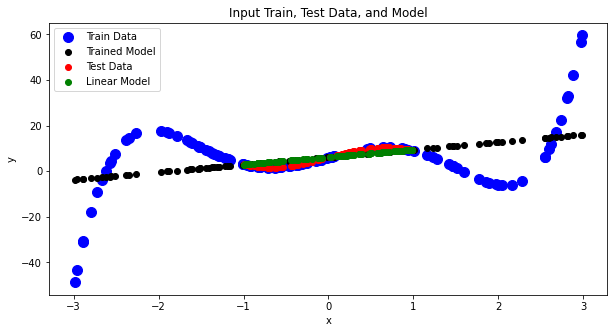

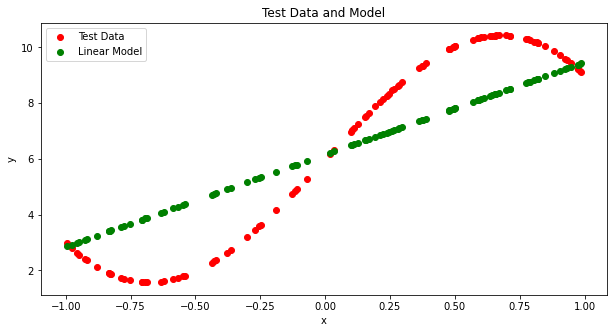

In [5]:
################################################################################
################################################################################
##### CS 5783 - Machine Learning                                           #####
##### Assignment - 1                                                       #####
##### Question - 1 - 2                                                     #####
#####                                                                      #####
##### 09/16/2022                                                           #####
#####                                                                      #####
##### Furkan Oz                                                            #####
##### foz@okstate.edu                                                      #####
################################################################################
################################################################################
import numpy as np
import matplotlib.pyplot as plt

# Load train data
xArray = np.load('x_train.npy') 
yArray = np.load('y_train.npy')

yArray = np.reshape(yArray,[np.size(xArray,0), 1])

# Plotting
fig = plt.figure(figsize = (10, 5))

plt.plot(xArray, yArray, 'bo',markersize=10)

# Train the model
linreg = LinearRegression(alpha=1e-3, n_iters=10000)
h, theta, bias, finalJac = linreg.fit(xArray, yArray)
plt.plot(xArray, h, 'ko')

# Load test data
xArray = np.load('x_test.npy') 
yArray = np.load('y_test.npy')

# Calculate prediction and Jacobian from data (Linear model)
h = linreg.predict(xArray)
Jac = linreg.jacobian(h,yArray)
print("Final Error of Test Data:",Jac)

# Plotting
plt.plot(xArray, yArray, 'ro')
plt.plot(xArray, h, 'go')

plt.xlabel("x")
plt.ylabel("y")
plt.title("Input Train, Test Data, and Model")
plt.legend(['Train Data', 'Trained Model', 'Test Data','Linear Model'])

fig2 = plt.figure(figsize = (10.15, 5))
plt.plot(xArray, yArray, 'ro')
plt.plot(xArray, h, 'go')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Test Data and Model")
plt.legend(['Test Data','Linear Model'])
plt.show()

Model converged! Final Jacobian of training:  130.1284756324726
Final Error of Test Data: 16.823853779603773


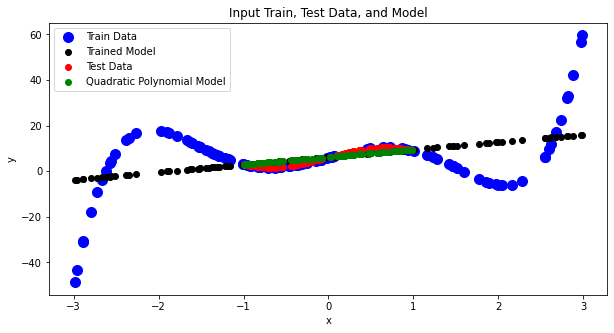

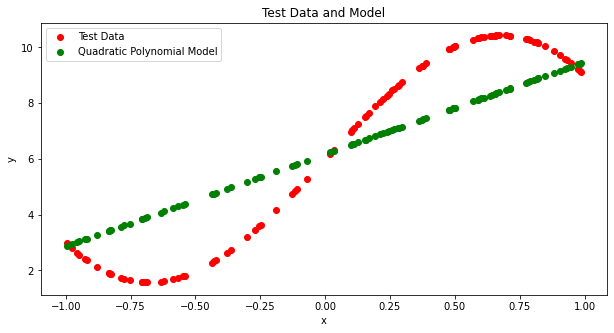

In [6]:
################################################################################
################################################################################
##### CS 5783 - Machine Learning                                           #####
##### Assignment - 1                                                       #####
##### Question - 1 - 2                                                     #####
#####                                                                      #####
##### 09/16/2022                                                           #####
#####                                                                      #####
##### Furkan Oz                                                            #####
##### foz@okstate.edu                                                      #####
################################################################################
################################################################################
import numpy as np
import matplotlib.pyplot as plt

# Load train data
xArray = np.load('x_train.npy') 
yArray = np.load('y_train.npy')

yArray = np.reshape(yArray,[np.size(xArray,0), 1])


# Second order Polynomial Model Feature Engineering
nSamples, nFeatures = xArray.shape
nFeatures += 1
xArray2 = np.zeros(nSamples*nFeatures)
xArray2 = np.reshape(xArray2,[nSamples, nFeatures])
for i in range(nSamples):
  xArray2[i,0] = xArray[i,0]
  xArray2[i,1] = xArray[i,0]*xArray[i,0]

# Plotting
fig = plt.figure(figsize = (10, 5))

plt.plot(xArray, yArray, 'bo',markersize=10)

# Train the model
linreg_quad = LinearRegression(alpha=1e-3, n_iters=10000)
h, theta, bias, finalJac = linreg_quad.fit(xArray2, yArray)
plt.plot(xArray, h, 'ko')

# Load test data
xArray = np.load('x_test.npy') 
yArray = np.load('y_test.npy')

# Second order Polynomial Model Feature Engineering
nSamples, nFeatures = xArray.shape
nFeatures += 1
xArray2 = np.zeros(nSamples*nFeatures)
xArray2 = np.reshape(xArray2,[nSamples, nFeatures])
for i in range(nSamples):
  xArray2[i,0] = xArray[i,0]
  xArray2[i,1] = xArray[i,0]*xArray[i,0]

# Calculate prediction and Jacobian from data (Quadratic model)
h = linreg_quad.predict(xArray2)
Jac = linreg_quad.jacobian(h,yArray)
print("Final Error of Test Data:",Jac)

plt.plot(xArray, yArray, 'ro')
plt.plot(xArray, h, 'go')

plt.xlabel("x")
plt.ylabel("y")
plt.title("Input Train, Test Data, and Model")
plt.legend(['Train Data', 'Trained Model', 'Test Data','Quadratic Polynomial Model'])

fig2 = plt.figure(figsize = (10.15, 5))
plt.plot(xArray, yArray, 'ro')
plt.plot(xArray, h, 'go')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Test Data and Model")
plt.legend(['Test Data','Quadratic Polynomial Model'])
plt.show()

Model converged! Final Jacobian of training:  130.0534368974135
Final Error of Test Data: 18.890632934478706


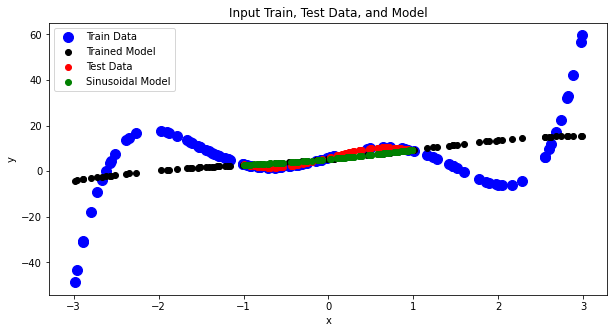

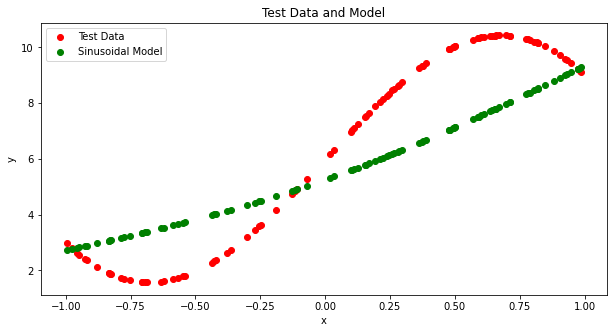

In [7]:
################################################################################
################################################################################
##### CS 5783 - Machine Learning                                           #####
##### Assignment - 1                                                       #####
##### Question - 1 - 2                                                     #####
#####                                                                      #####
##### 09/16/2022                                                           #####
#####                                                                      #####
##### Furkan Oz                                                            #####
##### foz@okstate.edu                                                      #####
################################################################################
################################################################################
import numpy as np
import math
import matplotlib.pyplot as plt

# Load train data
xArray = np.load('x_train.npy') 
yArray = np.load('y_train.npy')

yArray = np.reshape(yArray,[np.size(xArray,0), 1])


# Second order Polynomial Model Feature Engineering
nSamples, nFeatures = xArray.shape
nFeatures += 1
xArray2 = np.zeros(nSamples*nFeatures)
xArray2 = np.reshape(xArray2,[nSamples, nFeatures])
for i in range(nSamples):
  xArray2[i,0] = xArray[i,0]
  xArray2[i,1] = xArray[i,0]*math.sin(xArray[i,0])

# Plotting
fig = plt.figure(figsize = (10, 5))

plt.plot(xArray, yArray, 'bo',markersize=10)

# Train the model
linreg_quad = LinearRegression(alpha=1e-3, n_iters=100000)
h, theta, bias, finalJac = linreg_quad.fit(xArray2, yArray)
plt.plot(xArray, h, 'ko')
# Load test data
xArray = np.load('x_test.npy') 
yArray = np.load('y_test.npy')

# Sinusoidal Model Feature Engineering
nSamples, nFeatures = xArray.shape
nFeatures += 1
xArray2 = np.zeros(nSamples*nFeatures)
xArray2 = np.reshape(xArray2,[nSamples, nFeatures])
for i in range(nSamples):
  xArray2[i,0] = xArray[i,0]
  xArray2[i,1] = xArray[i,0]*math.sin(xArray[i,0])

# Calculate prediction and Jacobian from data (Quadratic model)
h = linreg_quad.predict(xArray2)
Jac = linreg_quad.jacobian(h,yArray)
print("Final Error of Test Data:",Jac)

plt.plot(xArray, yArray, 'ro')
plt.plot(xArray, h, 'go')

plt.xlabel("x")
plt.ylabel("y")
plt.title("Input Train, Test Data, and Model")
plt.legend(['Train Data', 'Trained Model', 'Test Data','Sinusoidal Model'])

fig2 = plt.figure(figsize = (10.15, 5))
plt.plot(xArray, yArray, 'ro')
plt.plot(xArray, h, 'go')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Test Data and Model")
plt.legend(['Test Data','Sinusoidal Model'])
plt.show()


Model converged! Final Jacobian of training:  90.04438094197099
Final Error of Test Data: 88.38010854275852


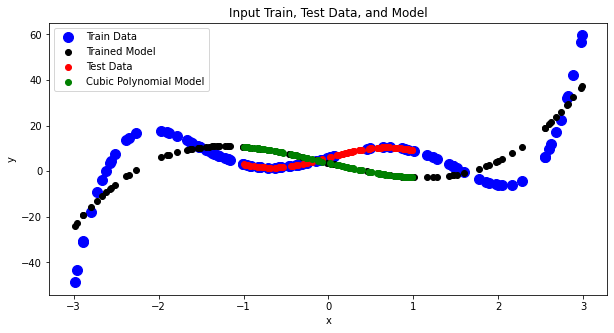

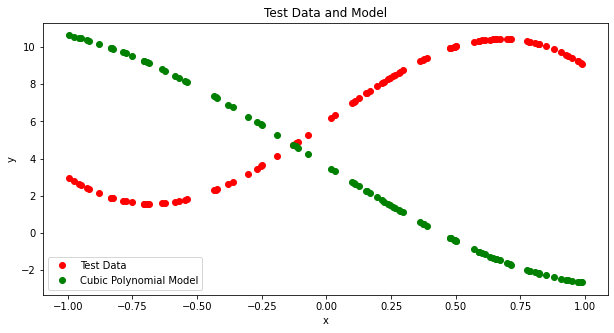

In [8]:
################################################################################
################################################################################
##### CS 5783 - Machine Learning                                           #####
##### Assignment - 1                                                       #####
##### Question - 1 - 2                                                     #####
#####                                                                      #####
##### 09/16/2022                                                           #####
#####                                                                      #####
##### Furkan Oz                                                            #####
##### foz@okstate.edu                                                      #####
################################################################################
################################################################################
import numpy as np
import matplotlib.pyplot as plt

# Load train data
xArray = np.load('x_train.npy') 
yArray = np.load('y_train.npy')

yArray = np.reshape(yArray,[np.size(xArray,0), 1])


# Second order Polynomial Model Feature Engineering
nSamples, nFeatures = xArray.shape
nFeatures += 2
xArray2 = np.zeros(nSamples*nFeatures)
xArray2 = np.reshape(xArray2,[nSamples, nFeatures])
for i in range(nSamples):
  xArray2[i,0] = xArray[i,0]
  xArray2[i,1] = xArray[i,0]*xArray[i,0]
  xArray2[i,2] = xArray[i,0]*xArray[i,0]*xArray[i,0]

# Plotting
fig = plt.figure(figsize = (10, 5))

plt.plot(xArray, yArray, 'bo',markersize=10)

# Train the model
linreg_cub = LinearRegression(alpha=1e-3, n_iters=10000)
h, theta, bias, finalJac = linreg_cub.fit(xArray2, yArray)
plt.plot(xArray, h, 'ko')
# Load test data
xArray = np.load('x_test.npy') 
yArray = np.load('y_test.npy')

# Third-order Polynomial Model Feature Engineering
nSamples, nFeatures = xArray.shape
nFeatures += 2
xArray2 = np.zeros(nSamples*nFeatures)
xArray2 = np.reshape(xArray2,[nSamples, nFeatures])
for i in range(nSamples):
  xArray2[i,0] = xArray[i,0]
  xArray2[i,1] = xArray[i,0]*xArray[i,0]
  xArray2[i,2] = xArray[i,0]*xArray[i,0]*xArray[i,0]

# Calculate prediction and Jacobian from data (Cubic model)
h = linreg_cub.predict(xArray2)
Jac = linreg_cub.jacobian(h,yArray)
print("Final Error of Test Data:",Jac)


plt.plot(xArray, yArray, 'ro')
plt.plot(xArray, h, 'go')

plt.xlabel("x")
plt.ylabel("y")
plt.title("Input Train, Test Data, and Model")
plt.legend(['Train Data', 'Trained Model', 'Test Data','Cubic Polynomial Model'])

fig2 = plt.figure(figsize = (10.12, 5))
plt.plot(xArray, yArray, 'ro')
plt.plot(xArray, h, 'go')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Test Data and Model")
plt.legend(['Test Data','Cubic Polynomial Model'])
plt.show()

Model converged! Final Jacobian of training:  89.94809546017783
Final Error of Test Data: 90.41152690286225


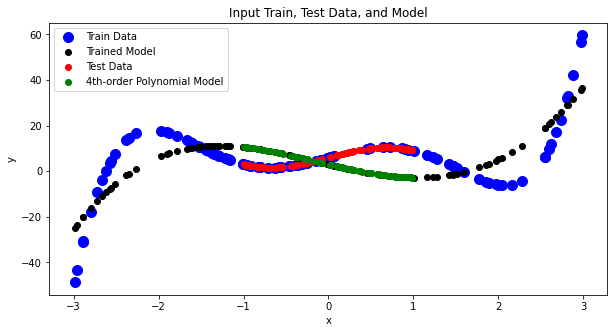

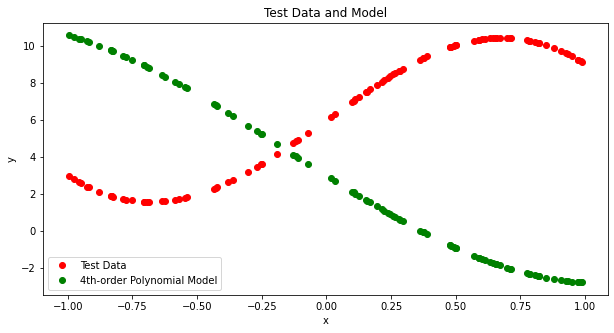

In [9]:
################################################################################
################################################################################
##### CS 5783 - Machine Learning                                           #####
##### Assignment - 1                                                       #####
##### Question - 1 - 2                                                     #####
#####                                                                      #####
##### 09/16/2022                                                           #####
#####                                                                      #####
##### Furkan Oz                                                            #####
##### foz@okstate.edu                                                      #####
################################################################################
################################################################################
import numpy as np
import matplotlib.pyplot as plt

# Load train data
xArray = np.load('x_train.npy') 
yArray = np.load('y_train.npy')

yArray = np.reshape(yArray,[np.size(xArray,0), 1])


# Second order Polynomial Model Feature Engineering
nSamples, nFeatures = xArray.shape
nFeatures += 3
xArray2 = np.zeros(nSamples*nFeatures)
xArray2 = np.reshape(xArray2,[nSamples, nFeatures])
for i in range(nSamples):
  xArray2[i,0] = xArray[i,0]
  xArray2[i,1] = xArray[i,0]*xArray[i,0]
  xArray2[i,2] = xArray[i,0]*xArray[i,0]*xArray[i,0]
  xArray2[i,3] = xArray[i,0]*xArray[i,0]*xArray[i,0]*xArray[i,0]

# Plotting
fig = plt.figure(figsize = (10, 5))

plt.plot(xArray, yArray, 'bo',markersize=10)

# Train the model
linreg_cub = LinearRegression(alpha=1e-3, n_iters=100000)
h, theta, bias, finalJac = linreg_cub.fit(xArray2, yArray)
plt.plot(xArray, h, 'ko')
# Load test data
xArray = np.load('x_test.npy') 
yArray = np.load('y_test.npy')

# 4th-order Polynomial Model Feature Engineering
nSamples, nFeatures = xArray.shape
nFeatures += 3
xArray2 = np.zeros(nSamples*nFeatures)
xArray2 = np.reshape(xArray2,[nSamples, nFeatures])
for i in range(nSamples):
  xArray2[i,0] = xArray[i,0]
  xArray2[i,1] = xArray[i,0]*xArray[i,0]
  xArray2[i,2] = xArray[i,0]*xArray[i,0]*xArray[i,0]
  xArray2[i,3] = xArray[i,0]*xArray[i,0]*xArray[i,0]*xArray[i,0]

# Calculate prediction and Jacobian from data (4th-order model)
h = linreg_cub.predict(xArray2)
Jac = linreg_cub.jacobian(h,yArray)
print("Final Error of Test Data:",Jac)


plt.plot(xArray, yArray, 'ro')
plt.plot(xArray, h, 'go')

plt.xlabel("x")
plt.ylabel("y")
plt.title("Input Train, Test Data, and Model")
plt.legend(['Train Data', 'Trained Model', 'Test Data','4th-order Polynomial Model'])

fig2 = plt.figure(figsize = (10.12, 5))
plt.plot(xArray, yArray, 'ro')
plt.plot(xArray, h, 'go')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Test Data and Model")
plt.legend(['Test Data','4th-order Polynomial Model'])
plt.show()

# Question 2

In this question, the csv file needs to be read and the model used in first question needs to be used to answer some questions. The related code block is given below. Please note that, the "LinearRegression" class is defined for previous question. Thus, it is not redefined. The best regression model is highly problem dependent. A model might perform quite well with a test data. However, it may not perform as well as previous data with another test data. The idea is to find an optimal solution which performs enough under the expected limits. If the test and train data is constant and the it is asked to find a best regression model, it is possible to find the best one. This may require weighted linear regression or basis functions depending on the problem. The answers of the numerated questions are:


1.   The error is defined as given in question one. The simple linear regression model led to an error as $16.174078444443914$. This is identical to norm of a residual vector where residual is the difference in between true results and the prediction. One can calculate the average least square error by taking square and dividing the number of samples. In that case, the average least squares error will be $9.688919019519$. 
2.   The factor has the most effect on the final prediction can be found by several methods. First, each feature is eliminated from the feature data and a new model is obtained. For instance, first "Local Price" data is eliminated and the model is run with the remaining features and then "number of bathroom" is eliminated and the model is run with the remaining features and so on. It has to be noted that every time only single feature is eliminated. If the feature has the most impact, one can expect the most difference in predictions. To check the difference, predictions from full model and the one that has one missing feature are substracted and the norm is calculated. According to this comparison, the highest difference is obtained when the "Living Area" is missing. The second way to decide most effective feature is to make a prediction by only using this model. The most effective feature may produce the closest prediction alone. According to this method, the most effective feature is "Local Prices". However, "Bathrooms" and "Living Area" are significantly close to "Local Prices". Bias on the model may be responsible for these close results. The last way to find the most effective feature is to check the $\theta$. The predicution is simply the multiplication of $\theta$ with sample point for each feature. If the $\theta$ corresponding that feature is highest, the contribution coming from this term will be the highest. However, for this judgement, sample points for each feature has to be in the same order of magnitude. That is why each feature is normalized by the maximum in that feature so that maximum sample is limitted to 1 for each feature. It should not effect the results because one can assume that maximum sample value is a scaling factor which is scalar and $\theta$ is also scalar. Once $\theta$ is calculated, one can compare the values to find the maximum and minimum contribution. "Living Area" is the most effective with this method as well. However, "Bathrooms" and "Local Prices" are relatively high for this method, too. When the three methods are compared, the most effective feature can be concluded as "Living Area". One can use only the most important factor to estimate the price. However, it will introduce some more error. If the obtained approximation is enough for the application, it is okay. If it is not, it may be better to use more features. The best candidates for those features are "Bathrooms" and "Local Prices".
3.   In this part, instead of the most effective feature, the least effective feature is asked. The same methods will be used as described in part 2. The only difference is that the error must be least when the least effective feature is substracted among features or the error must be highest when only least effective feature is used to make a prediction and the $\theta$ must be smallest for the least contribution. When the features are substracted, the least effect is observed for "# of Bedrooms". The same conclusion is done for $\theta$ as well. However, the highest error is not obtained when only this model is used. The highest error is obtained when the "Architecture Type" feature is used. It may be because of the data diversity. "Architecture Type" includes only 1, 2, and 3. There is 2 samples that is 3. This may be the reason it caused the highest error when used alone. According to other methods, the least effective feature is "# of Bedrooms".


Model converged! Final Jacobian of training:  16.174078444443914
*********************************************************************
Model converged! Final Jacobian of training:  16.73871561403818
Eliminated feature:  Local Price
Prediction Difference Error Between Full Model and Model with Eliminated Feature:  4.616456647342215
*********************************************************************
 
*********************************************************************
Model converged! Final Jacobian of training:  17.032194831237266
Eliminated feature:  Bathrooms
Prediction Difference Error Between Full Model and Model with Eliminated Feature:  5.03910736803695
*********************************************************************
 
*********************************************************************
Model converged! Final Jacobian of training:  16.25563073949485
Eliminated feature:  Land Area
Prediction Difference Error Between Full Model and Model with Eliminated Feature:  1.6060812

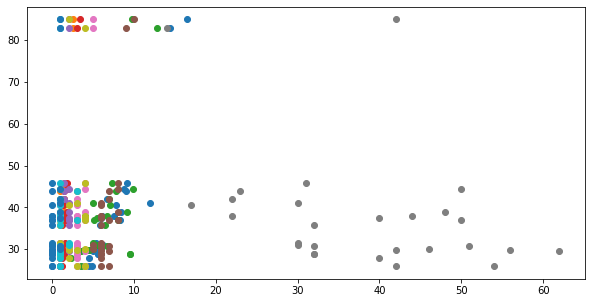

In [13]:
################################################################################
################################################################################
##### CS 5783 - Machine Learning                                           #####
##### Assignment - 1                                                       #####
##### Question - 2 - 1                                                     #####
#####                                                                      #####
##### 09/16/2022                                                           #####
#####                                                                      #####
##### Furkan Oz                                                            #####
##### foz@okstate.edu                                                      #####
################################################################################
################################################################################
import numpy as np
import csv
import matplotlib.pyplot as plt


# Load train data
file = open('Assignment1_Q2_Data.csv', encoding='utf-8-sig')
csvreader = csv.reader(file)
header = []
header = next(csvreader)
rows = []
for row in csvreader:
  rows.append(row)
file.close()
rows = np.array(rows)

nSamples, nFeatures = rows.shape
yArray = rows[:,(nFeatures-1)]
yArray = np.reshape(yArray,[nSamples, 1])
yArray = yArray.astype(float)

# Eliminate yArray and sample ID from features
nFeatures -= 2
xArray = np.zeros(nSamples*nFeatures)
xArray = np.reshape(xArray,[nSamples, nFeatures])
for i in range(nFeatures):
  xArray[:,i] = rows[:,i+1]

xArray = xArray.astype(float)

# Plotting
fig = plt.figure(figsize = (10, 5))
plt.plot(xArray, yArray,'o')

# Train the model
linreg = LinearRegression(alpha=1e-3, n_iters=100000)
h_full, theta, bias, finalJac = linreg.fit(xArray, yArray)

# Delete one feature at a time and compare with full model prediction
for i in range(nFeatures):
  xArray_test = np.delete(xArray,i,1)
  linreg = LinearRegression(alpha=5e-4, n_iters=1000000)
  print('*********************************************************************')
  h_subs, theta, bias, finalJac_dlt = linreg.fit(xArray_test, yArray)
  print('Eliminated feature: ',header[i+1])
  print('Prediction Difference Error Between Full Model and Model with Eliminated Feature: ',np.linalg.norm(h_full-h_subs))
  print('*********************************************************************')
  print(' ')

# Use only one feature to predict and compare it with full model prediction
for i in range(nFeatures):
  xArray_test = xArray[:,i]
  xArray_test = np.reshape(xArray_test,[nSamples, 1])
  linreg = LinearRegression(alpha=5e-4, n_iters=1000000)
  print('*********************************************************************')
  h_sngl, theta, bias, finalJac_sngl = linreg.fit(xArray_test, yArray)
  print('Only Used Feature: ',header[i+1])
  print('Prediction Difference Error Between Full Model and Single Feature Model: ',np.linalg.norm(h_full-h_sngl))
  print('*********************************************************************')
  print(' ')

# Scale each sample point and calculate theta
print(" ")
xArray_scaled = np.zeros(nSamples*nFeatures)
xArray_scaled = np.reshape(xArray,[nSamples, nFeatures])
for i in range(nFeatures):
  xArray_scaled[:,i] = xArray[:,i]/np.max(xArray[:,i])
linreg = LinearRegression(alpha=5e-4, n_iters=1000000)
h, theta, bias, finalJac_scaled = linreg.fit(xArray_scaled, yArray)
print("The theta vector for each feature for scaled samples:")
for i in range(nFeatures):
  print(header[i+1], ": ",theta[i])

plt.show()

# Question 3

In this question, it is asked to implement weighted linear regression for the data from question 1. The code block below shows the implementation. Please note that the "LinearRegression" class is defined previously. Thus, it is not defined again. The answers of the questions are:


1.   The weighted linear regression already approximates to the data well. The basis function adds extra feature. Thus, approximation may get better. However, the necessity of better approximation is debatable. Because of the overfitting, the model may not work as intended. If this is not the case, a proper basis function can be used to improve model accuracy.
2.   The main implementation difference is the usage of the train data repeatedly. In question 1, the model is generated by the train data, and it is used for test data. However, in the weighted version, the train data is used for every iteration. Another implementation difference for this particular code 
is that in question 1, gradient decent is used and for question 3, normal equations are used to find the minimum cost function.

The results show an oscillation around $x=0$. The reason for that is the missing/uneven data points. For a particular sample, if the number of samples on the right is higher than left, the weight will be in the favor of right side. This happened in these results. Because of the uneven data samples, an oscillation occured in the center. 


Final Error of Test Data: 14.75222158390172


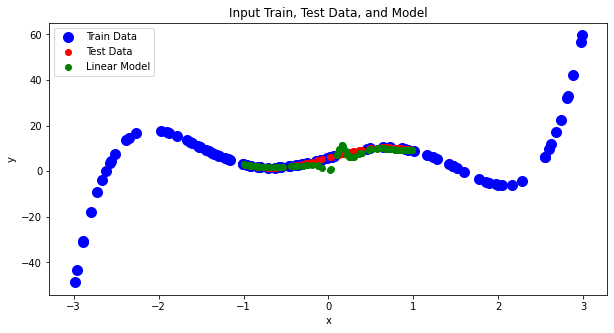

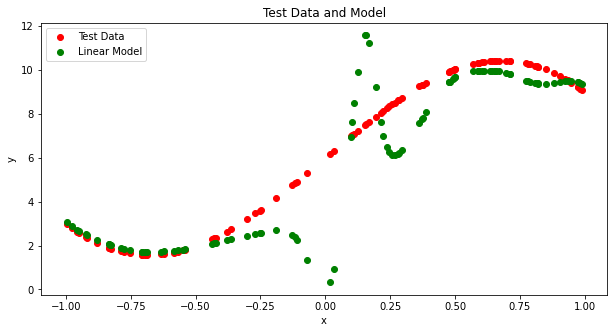

In [12]:
################################################################################
################################################################################
##### CS 5783 - Machine Learning                                           #####
##### Assignment - 1                                                       #####
##### Question - 3                                                         #####
#####                                                                      #####
##### 09/16/2022                                                           #####
#####                                                                      #####
##### Furkan Oz                                                            #####
##### foz@okstate.edu                                                      #####
################################################################################
################################################################################
import numpy as np
import matplotlib.pyplot as plt

# Load train data
xArray = np.load('x_train.npy') 
yArray = np.load('y_train.npy')

xArray_test = np.load('x_test.npy') 
yArray_test = np.load('y_test.npy')

yArray = np.reshape(yArray,[np.size(xArray,0), 1])
yArray_test = np.reshape(yArray_test,[np.size(xArray,0), 1])

# Train the model
linreg = LinearRegression(alpha=1e-3, n_iters=10000, eps=1e-6, tau=0.1)
h = linreg.weightedFit(xArray, xArray_test, yArray)

# Plotting
fig = plt.figure(figsize = (10, 5))

plt.plot(xArray, yArray, 'bo',markersize=10)

Jac = linreg.jacobian(h,yArray_test)
print("Final Error of Test Data:",Jac)

plt.plot(xArray_test, yArray_test, 'ro')
plt.plot(xArray_test, h, 'go')

plt.xlabel("x")
plt.ylabel("y")
plt.title("Input Train, Test Data, and Model")
plt.legend(['Train Data', 'Test Data','Linear Model'])

fig2 = plt.figure(figsize = (10.15, 5))
plt.plot(xArray_test, yArray_test, 'ro')
plt.plot(xArray_test, h, 'go')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Test Data and Model")
plt.legend(['Test Data','Linear Model'])
plt.show()


# Bonus
The below code block solves the first question with normal equations. It is not mandatory. However, I implemented this method to practice.

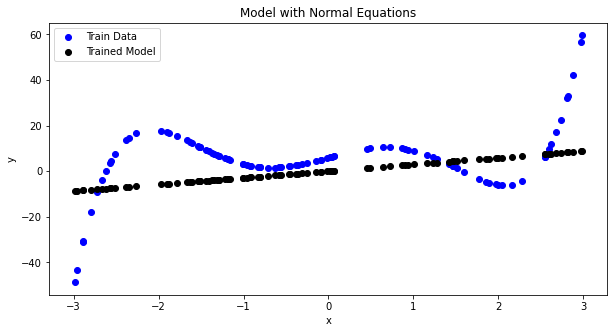

In [14]:
################################################################################
################################################################################
##### CS 5783 - Machine Learning                                           #####
##### Assignment - 1                                                       #####
##### Question - 1 - 2                                                     #####
#####                                                                      #####
##### 09/16/2022                                                           #####
#####                                                                      #####
##### Furkan Oz                                                            #####
##### foz@okstate.edu                                                      #####
################################################################################
################################################################################
import numpy as np
import matplotlib.pyplot as plt

xArray = np.load('x_train.npy') 

yArray = np.load('y_train.npy')

yArray = np.reshape(yArray,[np.size(xArray,0), 1])

xArrayT = xArray.T
yArrayT = yArray.T

# Plotting
fig = plt.figure(figsize = (10, 5))
 
plt.plot(xArray, yArray, 'bo')

# Theta calculation with Normal Equations
theta = np.dot(xArrayT,xArray)**(-1)*np.dot(xArrayT,yArray)

plt.plot(xArray, theta*xArray, 'ko')

plt.xlabel("x")
plt.ylabel("y")
plt.title("Model with Normal Equations")
plt.legend(['Train Data', 'Trained Model'])
plt.show()